<a href="https://colab.research.google.com/github/ShwetaAKS/Machine-Learning-/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1:Read the dataset
import pandas as pd
df = pd.read_csv('/content/PowerPlant (1).csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [2]:
#Target feature here is PE (Power Plant Energy output)

In [3]:
#Step 2:Perform Basic data quality checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [10]:
#Step 3: Seperate X and Y(PE)
x = df.drop(columns=['PE'])
y = df[['PE']]

In [11]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [13]:
#Step 4: Create a Preprocessing Pipeline for X
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [15]:
X_pre = num_pipe.fit_transform(x)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


In [19]:
#Step 5: Apply train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [20]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [21]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [23]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [25]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [26]:
#Step 5: Build the Keras neural network
xtrain.shape[1]


4

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Input


In [28]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [31]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 2s 3ms/step - loss: 206942.6406 - mae: 454.5886 - val_loss: 206062.1719 - val_mae: 453.6174
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 206654.0938 - mae: 454.2709 - val_loss: 205879.9062 - val_mae: 453.4162
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 206476.7031 - mae: 454.0754 - val_loss: 205705.0469 - val_mae: 453.2234
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 206301.9844 - mae: 453.8831 - val_loss: 205530.9688 - val_mae: 453.0313
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 206127.7812 - mae: 453.6912 - val_loss: 205357.1406 - val_mae: 452.8393
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 205953.8594 - mae: 453.4994 - val_loss: 205183.4531 - val_mae: 452.6476
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 205779.8750 - mae: 453.3076 - val_loss: 205

In [32]:
#Evaluate the model in train and test
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 0s 1ms/step - loss: 189728.5000 - mae: 435.2425


[189728.5, 435.24249267578125]

In [33]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 1ms/step - loss: 189557.2656 - mae: 435.0530


[189557.265625, 435.05303955078125]

In [34]:
#Step 6:Plot the learning curve
hist.history['loss']

[206942.640625,
 206654.09375,
 206476.703125,
 206301.984375,
 206127.78125,
 205953.859375,
 205779.875,
 205606.0,
 205432.265625,
 205258.671875,
 205085.078125,
 204911.734375,
 204738.25,
 204564.953125,
 204391.828125,
 204218.703125,
 204045.671875,
 203872.59375,
 203699.703125,
 203527.0,
 203354.25,
 203181.609375,
 203009.09375,
 202836.53125,
 202664.046875,
 202491.71875,
 202319.484375,
 202147.3125,
 201975.203125,
 201803.09375,
 201631.125,
 201459.3125,
 201287.46875,
 201115.734375,
 200944.015625,
 200772.5,
 200600.9375,
 200429.515625,
 200258.09375,
 200086.75,
 199915.6875,
 199744.484375,
 199573.359375,
 199402.390625,
 199231.453125,
 199060.5625,
 198889.859375,
 198719.125,
 198548.46875,
 198377.953125,
 198207.46875,
 198037.015625,
 197866.65625,
 197696.40625,
 197526.21875,
 197356.015625,
 197186.015625,
 197016.140625,
 196846.265625,
 196676.40625,
 196506.5625,
 196336.84375,
 196167.328125,
 195997.796875,
 195828.296875,
 195659.0625,
 195489.64

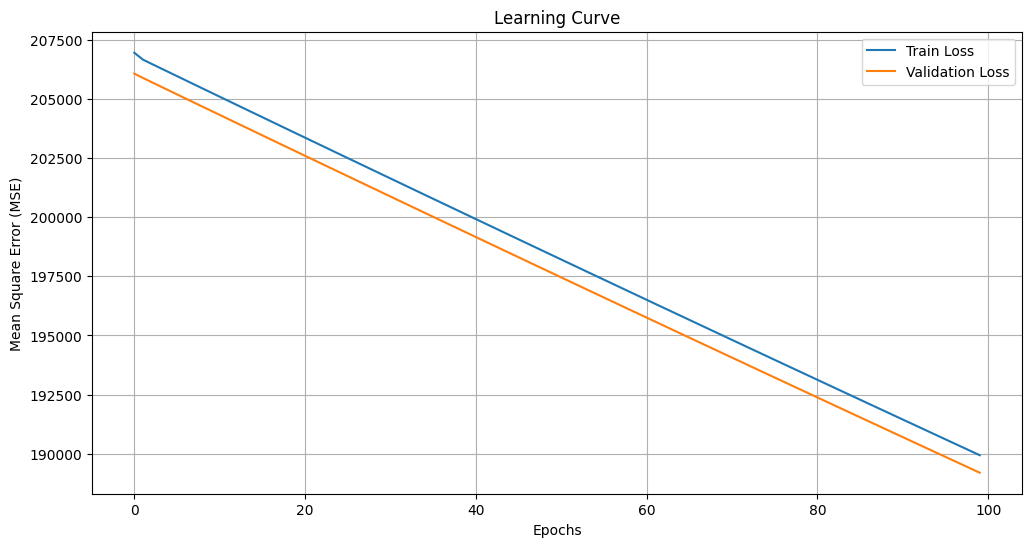

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


In [37]:
#Predict the results for train and test
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)


60/60 [==============================] - 0s 1ms/step


In [38]:
ypred_train[0:5]


array([[19.160488],
       [19.160488],
       [19.160488],
       [19.160488],
       [19.160488]], dtype=float32)

In [39]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [40]:
ypred_test[0:5]

array([[19.160488],
       [19.160488],
       [19.160488],
       [19.160488],
       [19.160488]], dtype=float32)

In [41]:
ytest.head()


,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [42]:
#Perform detailed evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [44]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 0s 2ms/step
Mean Squared Error : 189728.47
Root Mean Squared Error : 435.58
Mean Absolute Error : 435.24
R2 Score : -647.5956


In [45]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 1ms/step
Mean Squared Error : 189557.27
Root Mean Squared Error : 435.38
Mean Absolute Error : 435.05
R2 Score : -661.4538


In [46]:
#R2 score in test is 0.9336 > 0.8 hence above model is very good

In [47]:
#Saving above model (.keras)
model.save('PowerOutput.keras')

In [48]:
#Load the above model
from keras.models import load_model



In [49]:
m = load_model('/content/PowerOutput.keras')


In [50]:
m.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.07298802, -0.5453572 ,  0.37906367, -0.1212422 , -0.16167498,
          0.05732539, -0.26867655,  0.44595343],
        [ 0.36707175, -0.14719796,  0.5225888 ,  0.30266377,  0.3561236 ,
         -0.29097685,  0.31700766,  0.2517239 ],
        [-0.4182512 , -0.34845644,  0.65360254,  0.13638078,  0.38954583,
          0.5063206 , -0.6630289 , -0.33205268],
        [-0.05315008, -0.71934515,  0.43401232,  0.11659763,  0.17409709,
         -0.6695083 , -0.41587356, -0.2525497 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([-0.1502422 ,  0.14701697,  0.17307165, -0.15069628, -0.11389948,
        -0.11230378, -0.02048817, -0.0027825 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-0.7173389 ,  0.0380134 ,  0.37861952, -0.01972199],
        [-0.31519765, -0.6102713 , -0.58319104, -0.43618062],
        [-0.11271362, -0.7412908